## CNN (Convolutional Neural Networks)
- extract feature of image and convert it into lower dimnesion withou loosing its characteristics
- learns directly from data / images
- particularly useful in finding patterns in images to recognize objects, classes and categories
- image is given with 0-255 values, and we directly apply a filter on it
- Two types of images
    1. B/W image
        -  has values 0-255 for each pixel
        - 0: Black, 1: White
    2.  Color image
        - has RGB values in each pixel
        - each pixel has values between 0-255 for each of RGB
- values of filter are updated
- output is based on applied filter
- ```one convolutional op```
    - image + filter + activation function
    - applying activation function (ReLU, etc.) on an filtered image
    - converts 0-255 values of image to 0-1 range
    - ```Stride```
        ` moving filter by one step to calculate pixel value of reduced image for next pixel
- Converting 0-255 values of image to 0-1 range
    1. divide all pixel values with 255 to convert bewteen 0-1 range
    2. 0: Black
    3. 1: White
    4. between 0 & 1:Decimal Value
- ```Back Propagation```
    - changing values of filter
    - change values based on which set of values gives best information
- Calculating size of filtered / reduced image
    - if, input image has ```nxn``` matrix e.g. n=6, 6x6
    - and, filter has ```fxf``` matrix e.g. f=3, 3x3
    - then, size of reduced filter ```r=n-f+1``` e.g.r=6-3+1=4, 4x4
- ```Padding```
    - Now filtered image size is amller than actual image, we do padding to make it of same size as that of actual image
    - padded pixels should have value 0
- ```Max Pooling```
    - pick up maximum values out of calulated pixel value with each stride
    - ```Flattening```
        - make the picked values into a vertical list called as grid works as input to neural network for imge classification
- Four Layers of CNN
    1. Convolutional Layer
    2. Pooling Layer
    3. ReLU correction Layer
    4. Fully-Connected Layer

### importing libs

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras import datasets, layers, models

### loading dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

### Converting image pixels to numbers

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0
# convert pixel values between 0 and 1

### creating model

In [ ]:
model = models.Sequential()

### adding Layers

#### input layer

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Conv2D(num_of_filters, (f, f), activation, input_shape) :
# 32 is number of filters, 3x3 is filter size
# activation='relu'
# input_shape=(n, n, num_of_channels) : 32x32 is actual image size, num_of_channels=3 means RGB channels

#### MaxPooling Layer

In [ ]:
model.add(layers.MaxPooling2D((2, 2)))
# MaxPooling2D((f, f)) : creating filter of 2x2 size for maxpooling layer

#### ReLU correction Layer & another MaxPooling Layer

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# adding ReLU correction layer
model.add(layers.MaxPooling2D((2, 2)))
# adding another MaxPooling Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# adding another ReLU correction layer
# number of filters is chosen randomly

### Model summary

In [ ]:
model.summary()
# gives the summary of model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

### Adding Flattening Layer & Output Layer

In [ ]:
model.add(layers.Flatten())
# adding flattening layers
model.add(layers.Dense(64, activation='relu'))
# adding Fully Connected Layer
model.add(layers.Dense(10))
# adding output layer
# Dense(n) means n number of categories we have for images

### Compiling Model

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# compiling the model

### Training Model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 27s 16ms/step - loss: 1.5406 - accuracy: 0.4368 - val_loss: 1.3154 - val_accuracy: 0.5218
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1677 - accuracy: 0.5854 - val_loss: 1.0953 - val_accuracy: 0.6107
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0191 - accuracy: 0.6397 - val_loss: 0.9949 - val_accuracy: 0.6446
Epoch 4/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9206 - accuracy: 0.6761 - val_loss: 0.9769 - val_accuracy: 0.6676
Epoch 5/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8455 - accuracy: 0.7054 - val_loss: 0.9296 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7895 - accuracy: 0.7219 - val_loss: 0.9153 - val_accuracy: 0.6851
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7377 - accuracy: 0.7400 - val_loss: 0.9456 -

### Visualizing accuracy & val_accuracy

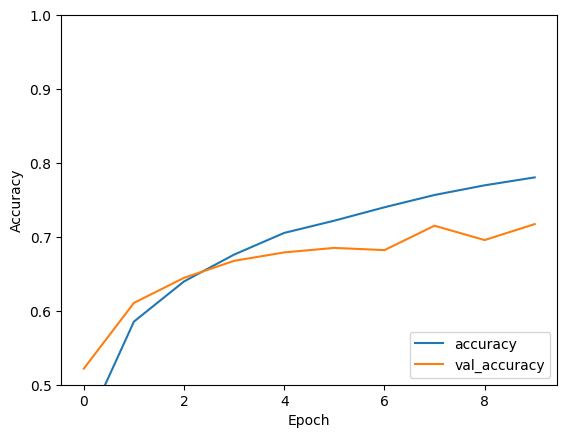

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### loss & accuracy for test data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.8694 - accuracy: 0.7173 - 4s/epoch - 14ms/step


## NLP Natural Language Processing
- technology that gives ability to computers to interpret, manipulate and comprehend human language
- sub field of AI (Artificial Intelligence)
- Steps
    1. ```Data Cleaning```
        - removing unneccassry data such as punctuation marks, converting str to num
    2. ```Tokenization```
        - converting data into small tokens such as words
        - essentially splitting a phrase, sentence, paragraph, or entire text document into smaller units, such as individual words or tokens
        - ```I am  reading a book.```  → ```I```, ```am```, ```reading```, ```a```, ```book```, ```.```
    3. Normalization
        - multiple techinques for normalization
        1. ```Stemming```
            - process reducing a work to its base word / root form, occurs in such a way that depicting a group of relatable words under the same stem, even if the root has no appropriate meaning
            - May/May Not reduce to some meaningful word
            - Syntax/Rule based approach, low accuracy, faster
            - if Meaning/Accuracy is not priority, then go with stemming, it has low accuracy
            
            - ```going``` → ```go```
            - ```playing``` → ```play```
            - ```history``` → ```histori``` // here stemming makes error, as output does not have a meaning
            - use cases
                - spam/ham mail classification
                - review classification
            - Stemming Algorithms
                - Porter Stemmer - Limited to english words only
                - Snowball Stemmer, etc.
        2. ```Lemmatization```
            - if Meaning/Accuracy is priority, then go with Lemmatization, it has high accuracy
            - dictionary based approach, high accuracy, slower
            - speed of lemmitizing is slow, it looks up in its dictionary
            - use cases
                - Text Summarization
                - Chat Bots
                - Question Answers
                - Language Transalation
        3. ```Word Embedding```
            - Representation of words used for text analysis in form of real vector such that the words having similar meaning are closer in vector space
            1. Count or Frequency
                1. ```OHE```(One Hot Encoding)
                2. ```BOW```(Bag Of Words)
                3. ```TF-IDF``` (Term Frequency - Inverse Document Frequency)
            2. Deep Learning Trained Models
                1. ```Word2Vec```
                - Technique to represent each word in vectors using Neural Network model (ANN) having the words with similar association to be represented together
                - vector is calculated based on 300 different dimensions
                - distance between vectors is calculated as ```1 - CosineSimilarity```
                - Advantages
                    - semantic meaning is also captured
                    -
                - neural network model
                - from large corpus of words, it finds out if words have some association
                - suggests the next word
                - every list of words is represented by a number called ```vector```
                    1. CBoW (Continuous Bag of Words)
                    2. Skipgrams
                2. ```GloVe``` (Global Vectors for Word Representation)
                    - GloVe is an unsupervised learning algorithm for obtaining vector representation of words
                    - these vectors capture the semantic relationships between words by analysing the co-occurence statistics of
    3. ```Bag of Words```
        - technique used to pre-process text and to extract all the features from a text document and convert it into the vectors (which are understood by the machine) to use in machine learning
        - converting raw text into words, then convert them into numbers/verctors using vectorization
        - ```vectorization```
            - convert document/text into vectors/numberic format
            - machine is not able to understand words, but understands Vectors
        - to extract the important features from the text, which can be used during training the machine
        - order of words in not important, we only create a bag or words
        - Disadvantages
            - Semantic meaning/context of words is lost
                - e.g. : Can you open the can ?
            - Vector Size
                - for large documents, vector size increases, leading to high computational time
        - frequency count is taken up
        - libraries
            - sklearn.countVectorizer
    4. ```Text to matrix```
        - convert text to matrix so that machine can read it
- Two types of outputs are involved in NLP
    1. Corpus
        - Collection of Text
    2. Doc Term Matrix
        -
- other NLP libraries are speci,  ```complete it```
- nltk (```Natural Language ToolKit```)
    - advantages
        - widely used
        - more human language support
    - Disadvantages
        - context
        - slow
        - does not work on Neural network techniques
    - need to use nltk library
    - has features to operate in NLP such as tokenization, etc.
- Uni-Gram : one word
- Bi-Gram : Two words
- Tri-Gram : Three words
- n-Gram : n words


### importing libs

In [ ]:
import nltk

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

### Stemmer

In [ ]:
ps = PorterStemmer()

#### Stemming on words

In [ ]:
words = ['program', 'programs', 'programmer', 'programming', 'programmers']

In [ ]:
for w in words:
    print(w, ps.stem(w))

program program
programs program
programmer programm
programming program
programmers programm


#### Stemming on sentence

In [ ]:
# on sentence
sentence = "Programmers program with programming languages"
words = word_tokenize(sentence)

In [ ]:
for w in words:
    print(w, ps.stem(w))

Programmers programm
program program
with with
programming program
languages languag


### importing libs

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

### downloading nltk packages

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
# open multi lingual wordnet and relationships in various languages

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### setting stopwords

In [ ]:
stopwords.words('english')

### setting text to insert

In [ ]:
paragraph = "I have three visions for India"

In [ ]:
sentences = nltk.sent_tokenize(paragraph)

In [ ]:
stemmer = PorterStemmer()

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatizer.lemmatize('history')

'history'

In [ ]:
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    corpus.append(review)

In [ ]:
for i in corpus:
    words = nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(stemmer.stem(word))

three
vision
india


In [ ]:
#LEMMATIZATION
corpus = []
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z]', ' ', sentences[i])
    review = review.lower()
    review = review.split() # get each and every sentences
    review = [lemmatizer.lemmatize(word) for word in review if <complete it>]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
# BAG OF WORDS
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
# default binary=False ngram_range=(2, <complete it>)

In [ ]:
X = cv.fit_transform(corpus)

In [ ]:
cv.vocabulary_
# all words with index number (feature number <complete it>)

In [ ]:
corpus[0]

IndexError: ignored

In [ ]:
x[0].toarray()

In [ ]:
# GloVec